In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [3]:
pv = pd.read_csv('{}/data/processed/resources/pv_processed.csv'.format(project_dir))
pv.datetime=pd.to_datetime(pv.datetime)
pv.head()

,Unnamed: 0,datetime,capacity_factor
0,0,1980-01-01 00:00:00,0.0
1,1,1980-01-01 01:00:00,0.0
2,2,1980-01-01 02:00:00,0.0
3,3,1980-01-01 03:00:00,0.0
4,4,1980-01-01 04:00:00,0.0


In [4]:
pv_one_year = pv[(pv.datetime > "2010") & (pv.datetime < "2016")]
pv_one_year.head()

,Unnamed: 0,datetime,capacity_factor
262993,262993,2010-01-01 01:00:00,0.0
262994,262994,2010-01-01 02:00:00,0.0
262995,262995,2010-01-01 03:00:00,0.0
262996,262996,2010-01-01 04:00:00,0.0
262997,262997,2010-01-01 05:00:00,0.0


/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


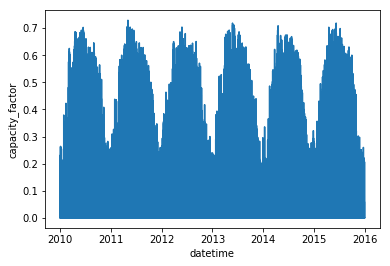

In [5]:
sns.lineplot(data = pv_one_year, x='datetime', y='capacity_factor')

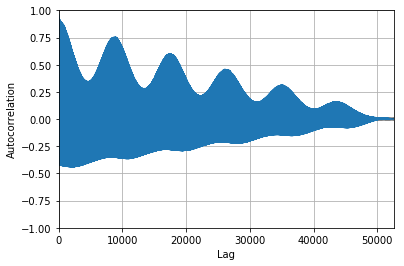

In [7]:
autocorrelation_plot(pv_one_year.capacity_factor)

In [8]:
pv_diff = pv_one_year.capacity_factor.diff().dropna()

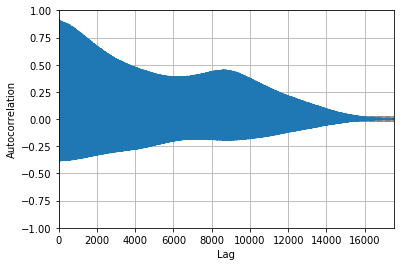

In [75]:
autocorrelation_plot(pv_diff)

In [9]:
model = SARIMAX(pv_one_year.capacity_factor, order=(4000,1,0), seasonal_order=(1, 1, 1, 9000), enforce_stationarity=False)

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_fit = model.fit(enforce_stationarity=False)